Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

In [1]:
import retinoto_py as fovea
args = fovea.Params(do_fovea=True)
args

Welcome on macOS-26.1-arm64-arm-64bit-Mach-O	 user laurent	Running on MPS device (Apple Silicon/MacOS)	 - macos_version = 26.1	 with device mps, pytorch==2.9.1
Random seed 1998 has been set.


Params(image_size=224, do_mask=False, do_fovea=True, rs_min=0.0, rs_max=-5.0, padding_mode='zeros', seed=1998, batch_size=64, num_workers=4, in_memory=True, model_name='resnet101', do_scratch=False, num_epochs=10, n_train_stop=32768, n_val_stop=4096, lr=1e-05, delta1=0.1, delta2=0.0, weight_decay=0.01, label_smoothing=0.01, shuffle=True, verbose=True)

# testing each network on the validation dataset

In [10]:
%ls cached_data/32*

cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.json
cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.pth


In [3]:
# %rm cached_data/32_fovea_model_*  # FORCING RECOMPUTE
# %rm cached_data/32_fovea_model_*.lock  # FORCING RECOMPUTE
model_name = args.model_name
# for dataset in fovea.all_datasets:
for dataset in ['bbox']:# <HACK to go fat-ster ot the point
    name = f'32_fovea_model_name={model_name}_dataset={dataset}_retrained'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    print(50*'.')

zsh:1: no matches found: cached_data/32_fovea_model_*


Putting images in memory:   0%|          | 0/32768 [00:00<?, ?it/s]

Putting images in memory:   0%|          | 0/4096 [00:00<?, ?it/s]

Training model resnet101, file= cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.pth - image_size=224
Model has 1000 output features to final FC layer for 1000 classes.
Starting learning...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

epoch=1/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 1/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=2/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 2/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=3/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 3/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=4/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 4/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=5/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 5/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=6/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 6/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=7/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 7/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=8/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 8/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=9/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 9/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=10/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 10/10:   0%|          | 0/4096 [00:00<?, ?it/s]

Saving...cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.pth
Training completed in 30m 12s
..................................................


## Model comparison

In [4]:
results_13 = fovea.pd.read_json(args.data_cache / '13_model_comparison.json')
results_13

,model_name,do_mask,dataset,accuracy,wall_clock_time,total_parameters,trainable_parameters,total_layers
0,resnet18,True,full,0.640470,13.145956,11689512,11689512,68
1,resnet50,True,full,0.850248,16.510967,25557032,25557032,151
2,resnet101,True,full,0.857364,19.696220,44549160,44549160,287
3,resnet18,True,bbox,0.588026,11.367146,11689512,11689512,68
4,resnet50,True,bbox,0.811572,14.895218,25557032,25557032,151
5,resnet101,True,bbox,0.816677,18.000916,44549160,44549160,287
6,resnet18,False,full,0.749072,12.220315,11689512,11689512,68
7,resnet50,False,full,0.847618,15.743440,25557032,25557032,151
8,resnet101,False,full,0.865254,18.925669,44549160,44549160,287
9,resnet18,False,bbox,0.723082,10.675140,11689512,11689512,68


In [5]:
%ls cached_data/20*

cached_data/20_model_name=resnet101_dataset=full_retrained.json
cached_data/20_model_name=resnet101_dataset=full_retrained.pth


In [6]:
model_name, dataset

('resnet101', 'bbox')

In [ ]:
# results_20 = fovea.pd.read_json(args.data_cache / '20_model_name={model_name}_dataset={dataset}_retrained.json')
# results_20

FileNotFoundError: File cached_data/20_model_name={model_name}_dataset={dataset}_retrained.json does not exist

In [ ]:
# for dataset in fovea.all_datasets:
#     name = f'20_model_name={model_name}_dataset={dataset}_retrained'
#     model_filename, json_filename = fovea.do_learning(args, dataset, name)
#     results = fovea.pd.read_json(json_filename)
#     print(results)

Load JSON from pre-trained resnet cached_data/20_model_name=resnet101_dataset=full_retrained.json
cached_data/20_model_name=resnet101_dataset=full_retrained.pth: accuracy = 0.038
    epoch  i_image  total_image  loss_train  acc_train   loss_val   acc_val  \
0       0     6464        19202    0.170983   0.945891   0.990043  0.792187   
1       1     6464        38404    0.071813   0.976200   1.088533  0.782812   
2       2     6464        57606    0.045622   0.985939   1.281810  0.755625   
3       3     6464        76808    0.035371   0.989064   1.244092  0.747500   
4       4     6464        96010    0.029115   0.990782   1.429504  0.731719   
5       5     6464       115212    0.027784   0.991199   1.500364  0.703750   
6       6     6464       134414    0.026516   0.991668   1.631877  0.681719   
7       7     6464       153616    0.027017   0.990782   1.878743  0.646562   
8       8     6464       172818    0.023101   0.991511   2.300825  0.608437   
9       9     6464       192020

Putting images in memory:   0%|          | 0/32768 [00:00<?, ?it/s]

Putting images in memory:   0%|          | 0/4096 [00:00<?, ?it/s]

Training model resnet101, file= cached_data/20_model_name=resnet101_dataset=bbox_retrained.pth - image_size=224
Model has 1000 output features to final FC layer for 1000 classes.
Starting learning...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

epoch=1/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 1/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=2/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 2/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=3/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 3/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=4/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 4/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=5/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 5/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=6/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 6/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=7/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 7/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=8/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 8/10:   0%|          | 0/4096 [00:00<?, ?it/s]

epoch=9/10:   0%|          | 0/512 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Plot learning evolution

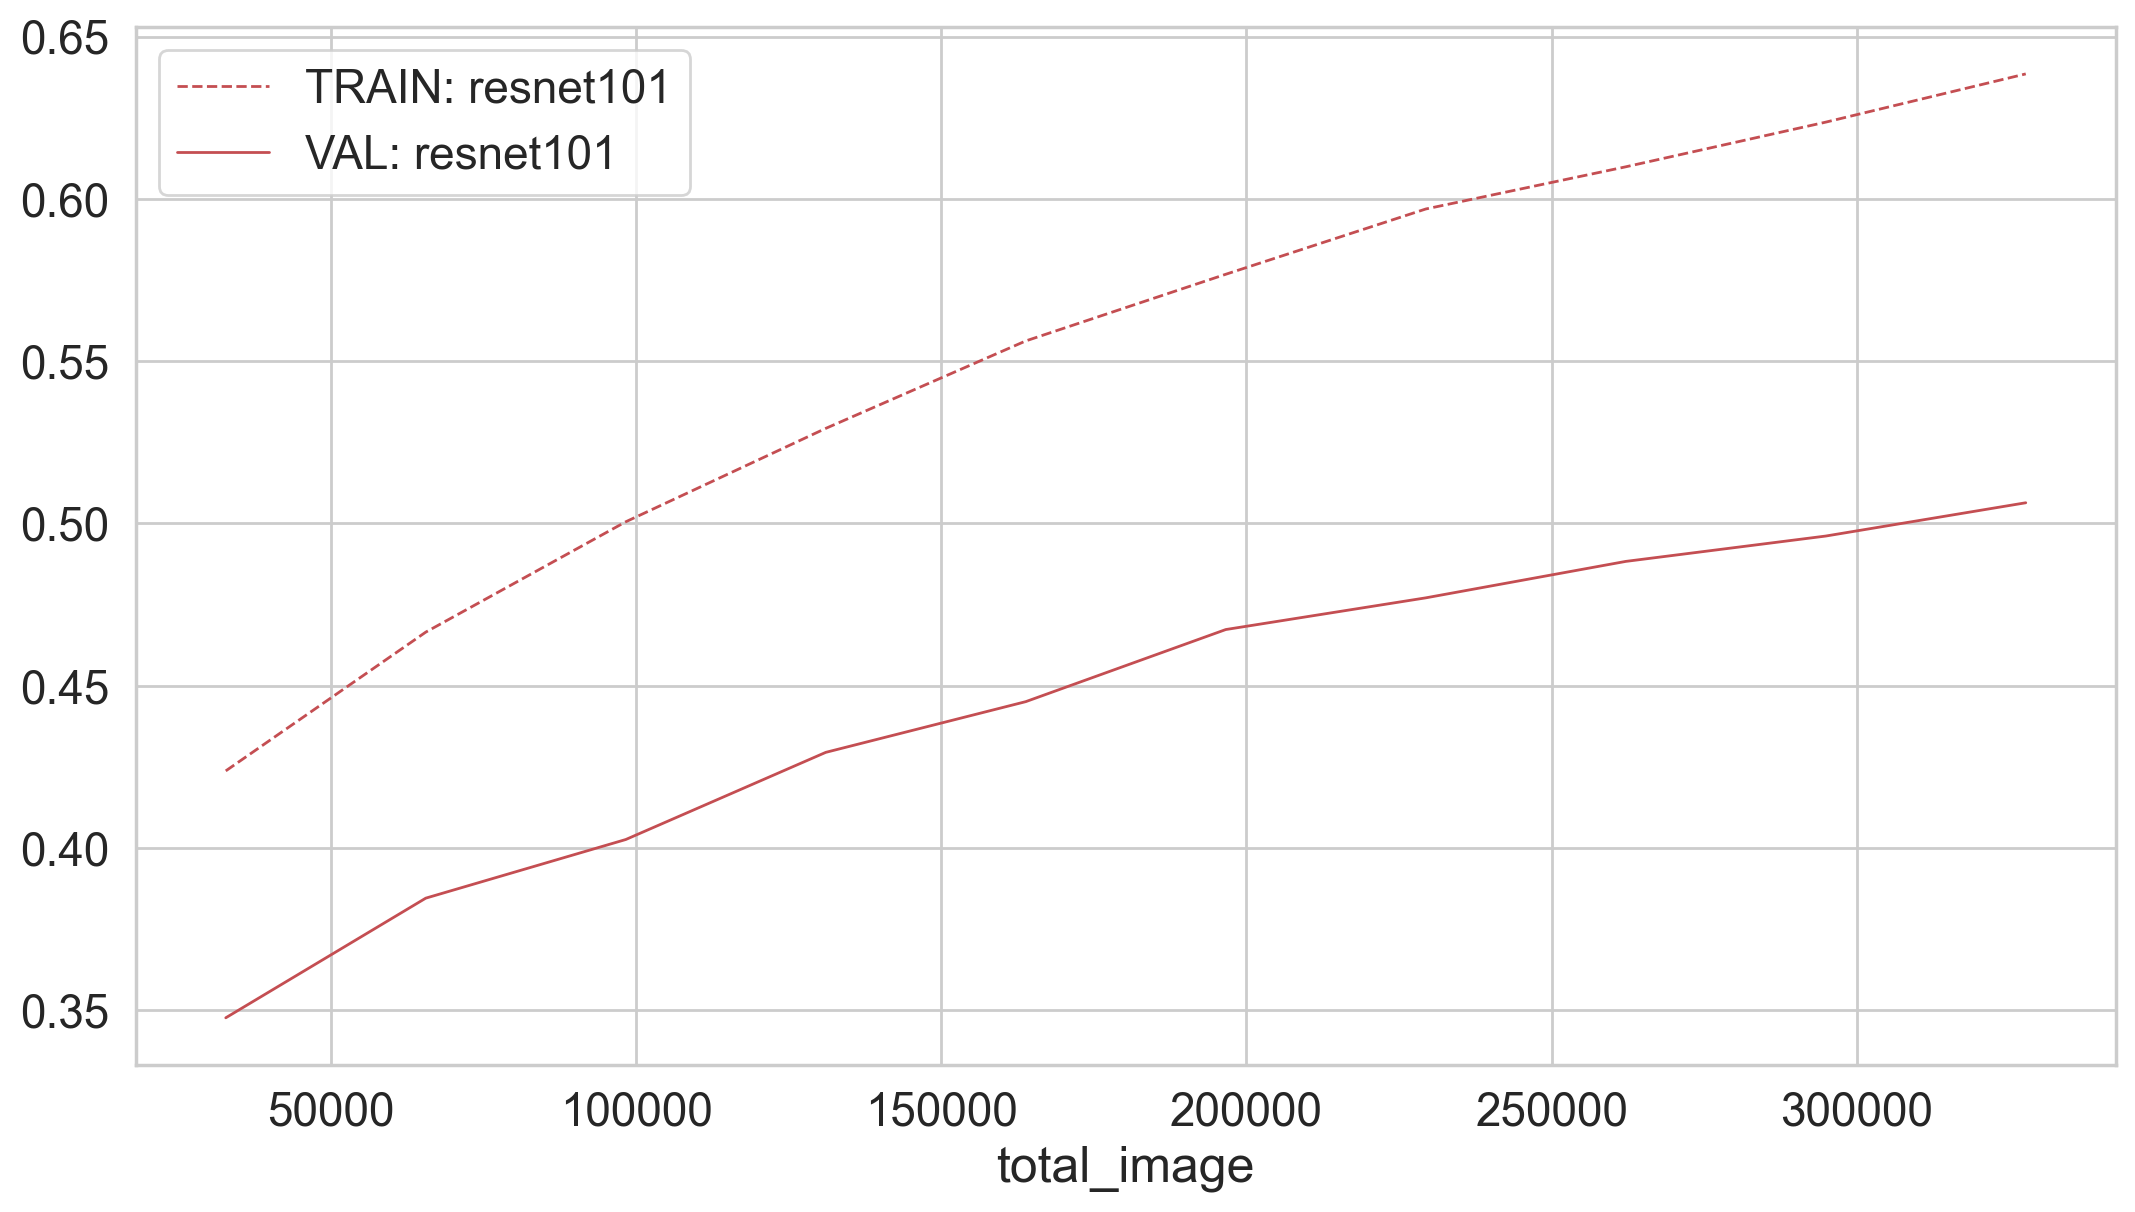

In [21]:
fig, ax = fovea.plt.subplots()
for dataset in ['bbox']:#fovea.all_datasets:
    color = 'r'
    lw = 1

    # name = f'32_fovea_model_name={model_name}_dataset={dataset}_retrained'
    # cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.json
    json_filename = args.data_cache / f'32_fovea_model_name={model_name}_dataset={dataset}_retrained.json'
    # model_filename, json_filename = fovea.do_learning(args, dataset, name)

    df_train = fovea.pd.read_json(json_filename, orient='records')

    # df_train_roll = df_train.rolling(window=5, min_periods=1, center=False).mean()
    ax = df_train.plot(x='total_image', y='acc_train', 
                        c=color, ls='dashed', lw=lw,
                        grid=True, ax=ax, label='TRAIN: ' + args.model_name)    
    ax = df_train.plot(x='total_image', y='acc_val', 
                        c=color, lw=lw,
                        grid=True, ax=ax, label='VAL: ' + args.model_name)   

In [17]:
df_train

,epoch,i_image,total_image,loss_train,acc_train,loss_val,acc_val,time
0,0,4096,32768,3.222590,0.423737,3.601235,0.347656,189.999385
1,1,4096,65536,2.801902,0.466492,3.278449,0.384521,368.400732
2,2,4096,98304,2.508028,0.500488,3.112691,0.402588,546.772905
3,3,4096,131072,2.286706,0.529266,2.931640,0.429443,731.422124
4,4,4096,163840,2.095919,0.556213,2.807517,0.445068,909.456239
5,5,4096,196608,1.970737,0.576752,2.688738,0.467285,1093.722303
6,6,4096,229376,1.844404,0.596863,2.617008,0.477051,1277.642078
7,7,4096,262144,1.754448,0.609863,2.543082,0.488281,1455.757325
8,8,4096,294912,1.671228,0.623627,2.469525,0.496094,1633.845698
9,9,4096,327680,1.594190,0.638489,2.412606,0.506348,1811.925023


In [19]:
json_filename

PosixPath('cached_data/32_fovea_model_name=resnet101_dataset=bbox_retrained.json')

In [20]:
%pwd

'/Users/laurent/app54_nextcloud/science/retinoto_py'

In [ ]:
fovea.get_dataset??

Signature:
fovea.get_dataset(
    args,
    DATA_DIR,
    angle_min=None,
    angle_max=None,
    in_memory=None,
    n_stop=0,
)
Docstring: <no docstring>
Source:   
def get_dataset(args, DATA_DIR, angle_min=None, angle_max=None, in_memory=None, n_stop=0):
    preprocess = get_preprocess(args, angle_min=angle_min, angle_max=angle_max)
    # --- 2. Create Dataset and DataLoader using ImageFolder ---
    # ImageFolder automatically infers class names from directory names
    # and maps them to integer indices.
    if in_memory is None: in_memory = args.in_memory
    if in_memory:
        # Use in-memory dataset instead of ImageFolder
        dataset = InMemoryImageDataset(root=DATA_DIR, transform=preprocess, n_stop=n_stop)
    else:    
        dataset = datasets.ImageFolder(root=DATA_DIR, transform=preprocess)

    # The dataset provides a mapping from class index to class name (folder name)
    class_to_idx = dataset.class_to_idx
    # We often want the inverse mapping for printing re